Populating the interactive namespace from numpy and matplotlib


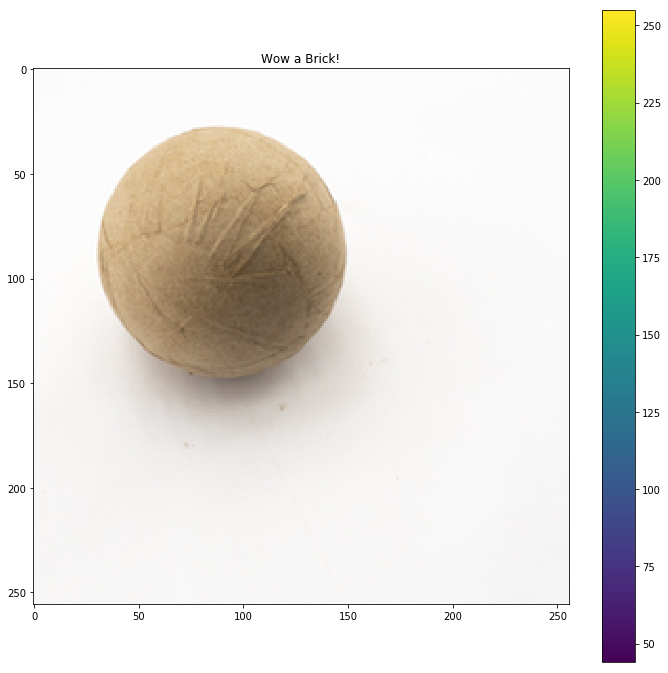

In [93]:
%pylab inline 
im = imread('../data/easy/ball/ball_1.jpg')
fig = figure(0, (12,12))
imshow(im); title('Wow a Brick!'); colorbar()

In [94]:
def convert_to_grayscale(im):
    '''
    Convert color image to grayscale.
    Args: im = (nxmx3) floating point color image scaled between 0 and 1
    Returns: (nxm) floating point grayscale image scaled between 0 and 1
    '''
    return np.mean(im, axis = 2)

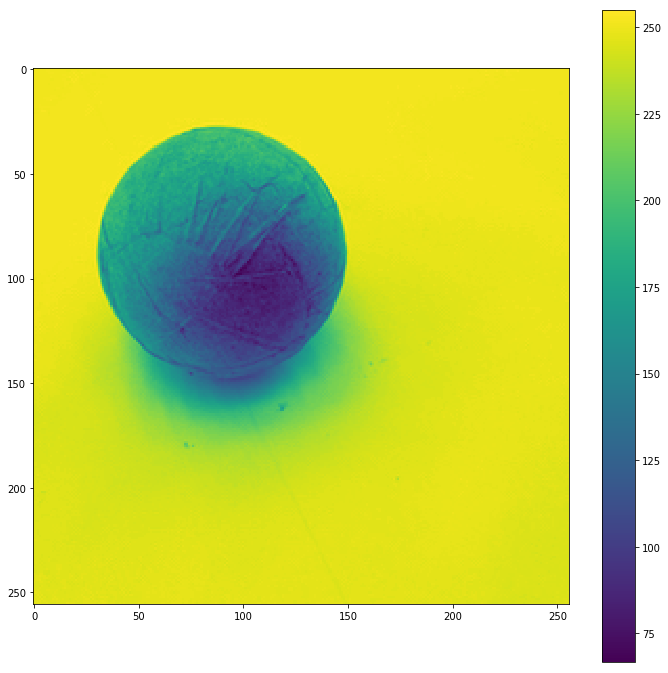

In [95]:
grayed = convert_to_grayscale(im)

fig = figure(0, (12,12))
imshow(grayed); colorbar()

In [96]:
blur_size = 3
blur_kernel = (1/blur_size**2)*np.ones((blur_size,blur_size))
blur_kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [97]:
def filter_2d(im, kernel):
    '''
    Filter an image by taking the dot product of each 
    image neighborhood with the kernel matrix.
    Args:
    im = (H x W) grayscale floating point image
    kernel = (M x N) matrix, smaller than im
    Returns: 
    (H-M+1 x W-N+1) filtered image.
    '''

    M = kernel.shape[0] 
    N = kernel.shape[1]
    H = im.shape[0]
    W = im.shape[1]
    
    filtered_image = np.zeros((H-M+1, W-N+1), dtype = 'float64')
    
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            image_patch = im[i:i+M, j:j+N]
            filtered_image[i, j] = np.sum(np.multiply(image_patch, kernel))
            
    return filtered_image

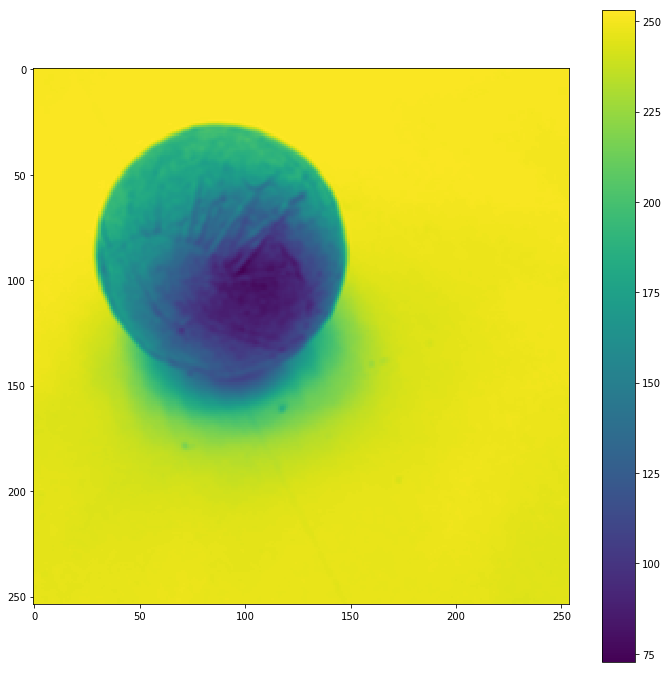

In [98]:
blured = filter_2d(grayed, blur_kernel)

fig = figure(0, (12,12))
imshow(blured); colorbar()

In [99]:
def roberts_cross(x):
    '''
    Compute Robert's Cross of input image x.
    Args:
    x: (nxm) grayscale floating point image
    Returns:
    (n-1) x (m-1) edge image. 
    '''
    
    edges = np.zeros((x.shape[0]-1,x.shape[1]-1)) #Our output will image will be one pixel smaller than our image

    for i in range(x.shape[0]-1):
        for j in range(x.shape[1]-1):
            #Grab Appropriate (2x2) image patch
            image_patch = x[i:i+2, j:j+2]
            # Compute Robert's Cross for image patch
            edges[i, j] = np.sqrt((image_patch[0,0] - image_patch[1, 1])**2 + 
                                   (image_patch[1, 0] - image_patch[0, 1])**2)
            '''
            if edges[i, j] <=10:
                edges[i, j] = 0
            else:
                edges[i,j] =255
            '''
    return edges

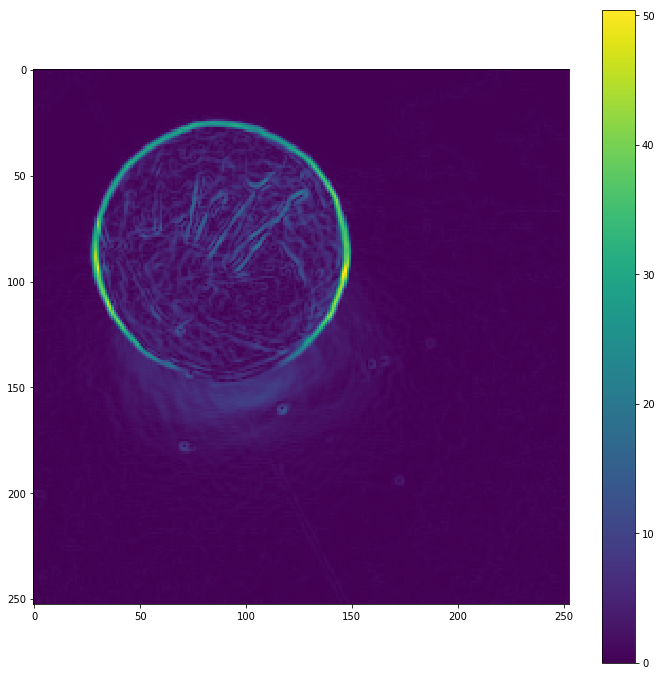

In [100]:
rc_edges = roberts_cross(blured)

fig = figure(0, (12,12))
imshow(rc_edges); colorbar()

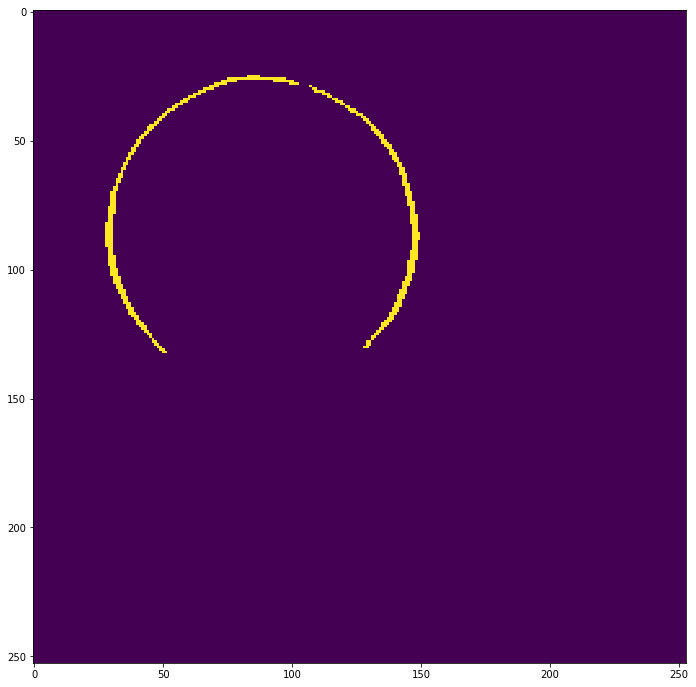

In [101]:
temp_edges= rc_edges>25
fig = figure(0, (12,12))
imshow(temp_edges)

In [102]:
total_rc_edges = sum(temp_edges==1)
total_rc_edges

553

In [103]:
#Implement Sobel kernels as numpy arrays
Kx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Ky = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

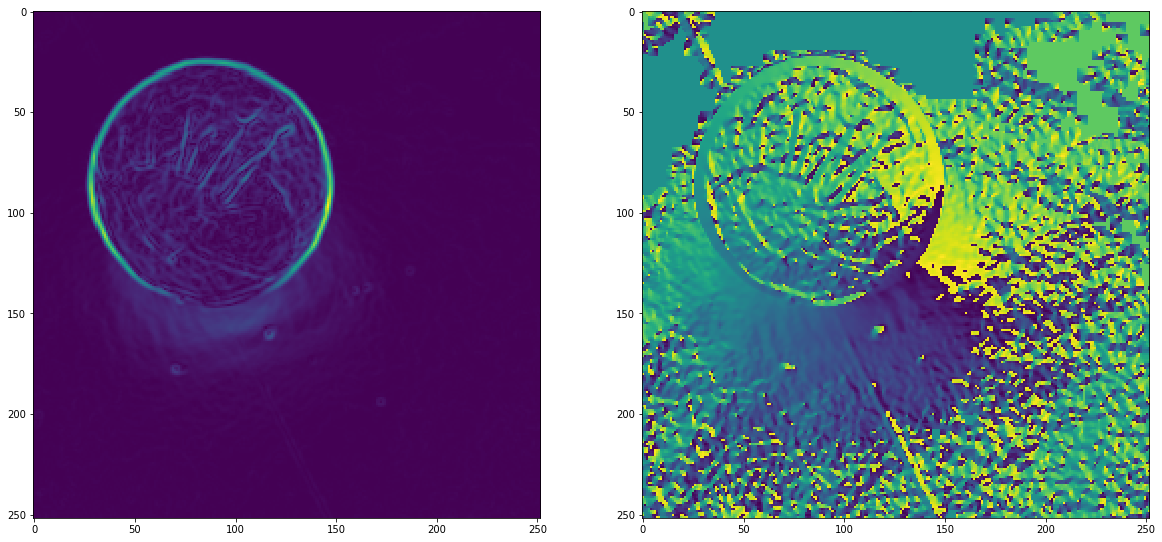

In [104]:
Gx = filter_2d(blured, Kx)
Gy = filter_2d(blured, Ky)

#Compute Gradient Magnitude and Direction:
G_magnitude = np.sqrt(Gx**2+Gy**2)
G_direction = np.arctan2(Gy, Gx)

fig = figure(0, (20,10))
fig1 = fig.add_subplot(1,2,1)
imshow(G_magnitude)

fig2 = fig.add_subplot(1,2,2)
imshow(G_direction)

In [105]:

from ipywidgets import interact
#Show all pixels with values above threshold:
def tune_thresh(thresh = 0):
    fig = figure(0, (8,8))
    imshow(G_magnitude > thresh)

In [106]:
interact(tune_thresh, thresh = (0, 255.0, 0.05))

interactive(children=(FloatSlider(value=0.0, description='thresh', max=255.0, step=0.05), Output()), _dom_clas…

<function __main__.tune_thresh(thresh=0)>

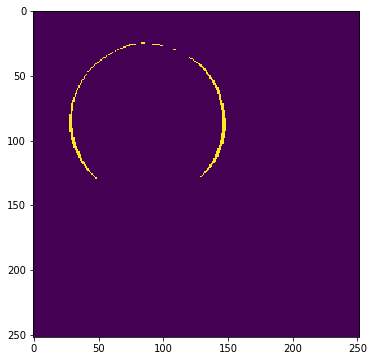

In [107]:
edges = G_magnitude > 150
fig = figure(0, (6,6))
imshow(edges)

In [108]:
#How manhy points are we mapping?
sum(edges==1)
type(edges)
edges.sum()

396

In [109]:
too_much = sum(edges==1)
too_much

396

In [77]:
edges

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

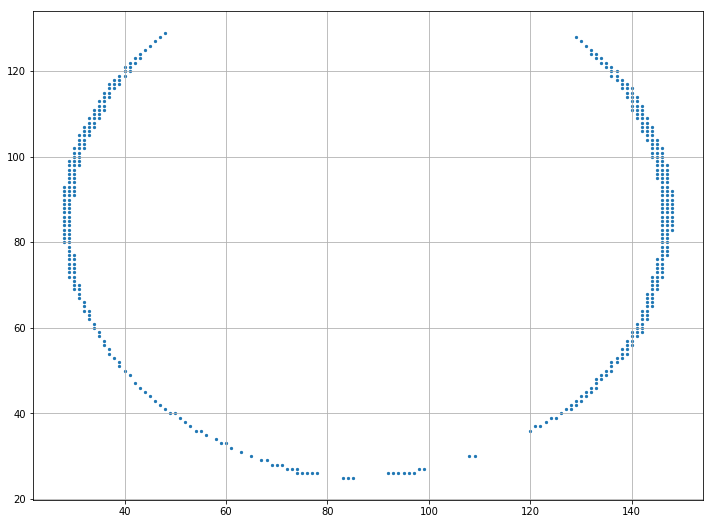

In [78]:
y_coords, x_coords = np.where(edges)
#x_coords, y_coords
#len(x_coords), len(y_coords)
fig = figure(0, (12,9))
scatter(x_coords, y_coords, s = 5)
grid(1)

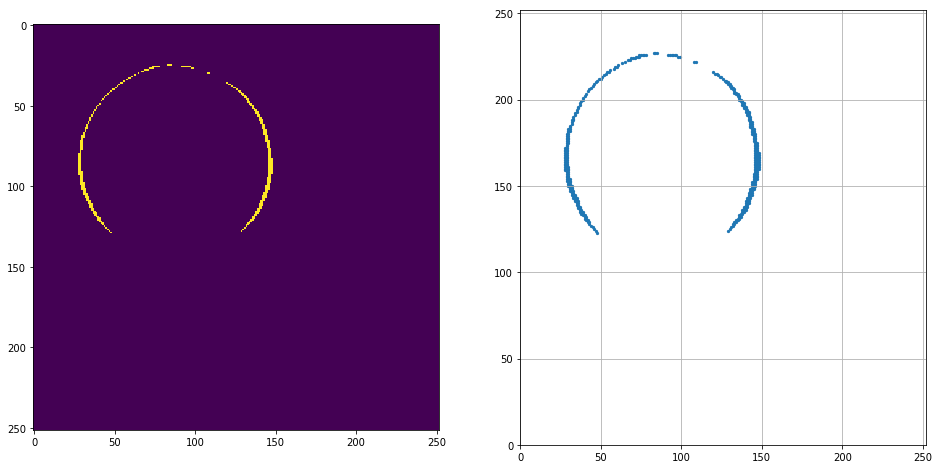

In [79]:
y_coords_flipped = edges.shape[1] - y_coords

fig = figure(0, (16,8))
ax = fig.add_subplot(1,2,1)
imshow(edges)

ax2 = fig.add_subplot(1,2,2)
scatter(x_coords, y_coords_flipped, s = 5)
grid(1)
xlim([0, edges.shape[0]]);
ylim([0, edges.shape[0]]);

In [80]:
#How many bins for each variable in parameter space?
phi_bins = 64
theta_bins = 64

accumulator = np.zeros((phi_bins, theta_bins))

In [81]:
rho_min = -edges.shape[0]
rho_max = edges.shape[1]

theta_min = 0
theta_max = np.pi

#Compute the rho and theta values for the grids in our accumulator:
rhos = np.linspace(rho_min, rho_max, accumulator.shape[0])
thetas = np.linspace(theta_min, theta_max, accumulator.shape[1])

#rhos
#thetas

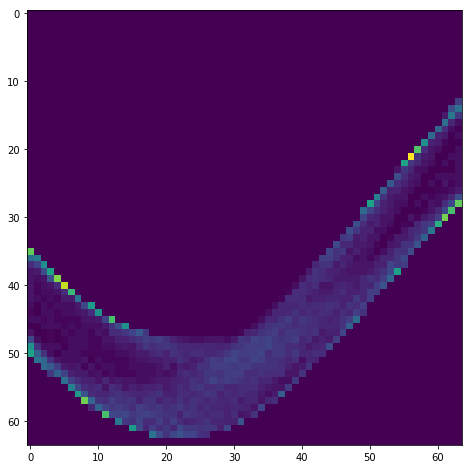

In [82]:
for i in range(len(x_coords)):
    #Grab a single point
    x = x_coords[i]
    y = y_coords_flipped[i]

    #Actually do transform!
    curve_rhos = x*np.cos(thetas)+y*np.sin(thetas)

    for j in range(len(thetas)):
        #Make sure that the part of the curve falls within our accumulator
        if np.min(abs(curve_rhos[j]-rhos)) <= 1.0:
            #Find the cell our curve goes through:
            rho_index = argmin(abs(curve_rhos[j]-rhos))
            accumulator[rho_index, j] += 1

fig = figure(0, (8,8))
imshow(accumulator);

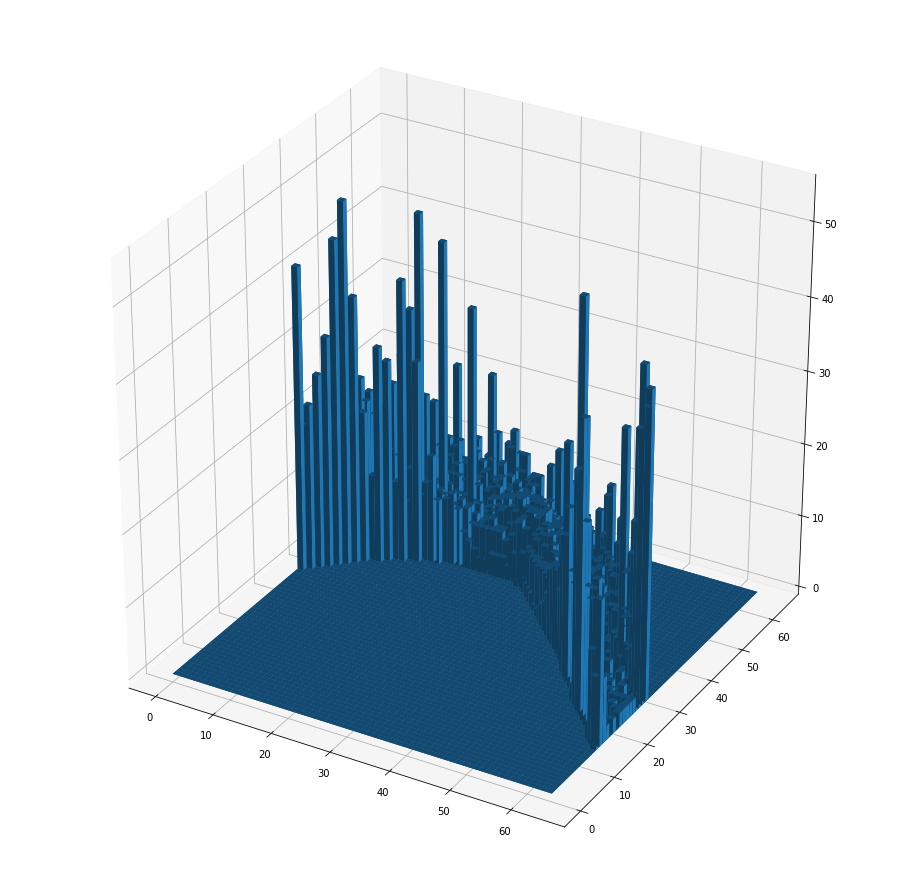

In [83]:
#This is a complex plot - might run pretty slow!
from mpl_toolkits.mplot3d import Axes3D

fig = figure(figsize=(16, 16));
ax1 = fig.add_subplot(111, projection='3d')

_x = np.arange(accumulator.shape[0])
_y = np.arange(accumulator.shape[1])
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = accumulator.ravel()
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade = True);

In [84]:
max_value = np.max(accumulator)
max_value

55.0

In [87]:
def tune_thresh(relative_thresh = 0.9):
    fig = figure(0, (8,8))
    imshow(accumulator > relative_thresh * max_value)
interact(tune_thresh, relative_thresh = (0, 1, 0.05))

interactive(children=(FloatSlider(value=0.9, description='relative_thresh', max=1.0, step=0.05), Output()), _d…

<function __main__.tune_thresh(relative_thresh=0.9)>

In [45]:
sum(edges)

1008

In [46]:
edges

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

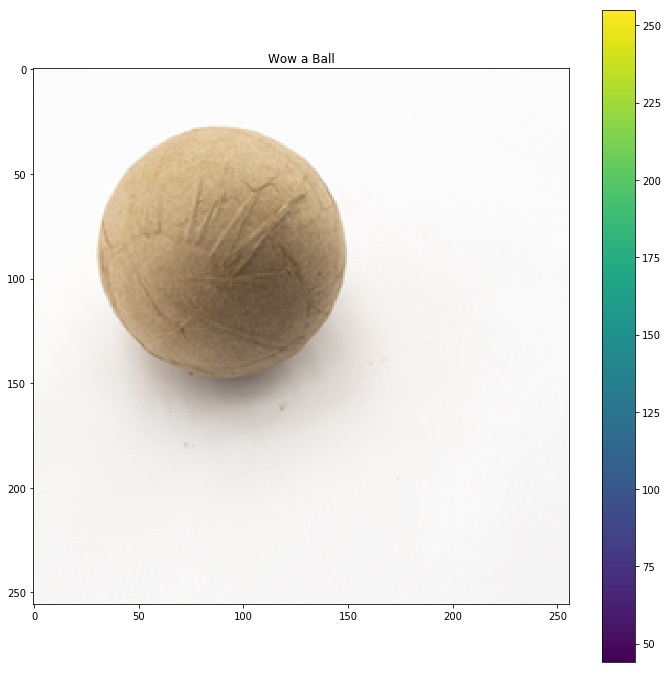

In [47]:
im = imread('../data/easy/ball/ball_1.jpg')
fig = figure(0, (12,12))
imshow(im); title('Wow a Ball'); colorbar()

In [48]:
import time

16 3.01702 210.0


(0, 300)

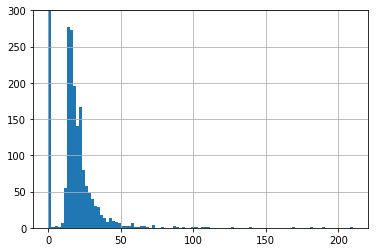

In [88]:
program_start = time.time()
im = imread('../data/easy/brick/brick_1.jpg')
grayed = convert_to_grayscale(im)
blured = filter_2d(grayed, blur_kernel)
Gx = filter_2d(blured, Kx)
Gy = filter_2d(blured, Ky)

#Compute Gradient Magnitude and Direction:
G_magnitude = np.sqrt(Gx**2+Gy**2)
#G_direction = np.arctan2(Gy, Gx)
edges = G_magnitude > 100
y_coords, x_coords = np.where(edges)
y_coords_flipped = edges.shape[1] - y_coords


accumulator = np.zeros((phi_bins, theta_bins))

for i in range(len(x_coords)):
    #Grab a single point
    x = x_coords[i]
    y = y_coords_flipped[i]

    #Actually do transform!
    curve_rhos = x*np.cos(thetas)+y*np.sin(thetas)

    for j in range(len(thetas)):
        #Make sure that the part of the curve falls within our accumulator
        if np.min(abs(curve_rhos[j]-rhos)) <= 1.0:
            #Find the cell our curve goes through:
            rho_index = argmin(abs(curve_rhos[j]-rhos))
            accumulator[rho_index, j] += 1
max_accum = np.max(accumulator)
edges = accumulator > max_accum*.35
total_edges = sum(edges==1)
program_end = time.time()
total_time = round(program_end-program_start,5)
print(total_edges, total_time, max_accum)

'''
fig1 = figure(0, (12,24))
fig1_1 = fig1.add_subplot(1,2,1)
imshow(edges)
fig1_2 = fig1.add_subplot(1,2,2)
imshow(accumulator)
'''

hist(accumulator.ravel(), 100);
grid(1); ylim(0,300)


93 2.11551 66.0


(0, 300)

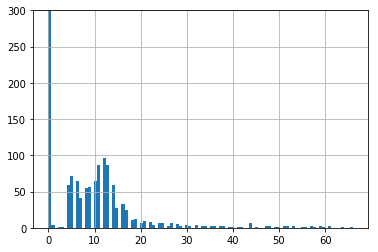

In [89]:
program_start = time.time()
im = imread('../data/easy/ball/ball_1.jpg')
grayed = convert_to_grayscale(im)
blured = filter_2d(grayed, blur_kernel)
Gx = filter_2d(blured, Kx)
Gy = filter_2d(blured, Ky)

#Compute Gradient Magnitude and Direction:
G_magnitude = np.sqrt(Gx**2+Gy**2)
#G_direction = np.arctan2(Gy, Gx)
edges = G_magnitude > 100
y_coords, x_coords = np.where(edges)
y_coords_flipped = edges.shape[1] - y_coords

accumulator = np.zeros((phi_bins, theta_bins))

for i in range(len(x_coords)):
    #Grab a single point
    x = x_coords[i]
    y = y_coords_flipped[i]

    #Actually do transform!
    curve_rhos = x*np.cos(thetas)+y*np.sin(thetas)

    for j in range(len(thetas)):
        #Make sure that the part of the curve falls within our accumulator
        if np.min(abs(curve_rhos[j]-rhos)) <= 1.0:
            #Find the cell our curve goes through:
            rho_index = argmin(abs(curve_rhos[j]-rhos))
            accumulator[rho_index, j] += 1
max_accum = np.max(accumulator)
edges = accumulator > max_accum*.35
total_edges = sum(edges==1)
program_end = time.time()
total_time = round(program_end-program_start,5)
print(total_edges, total_time, max_accum)

'''
fig1 = figure(0, (12,24))
fig1_1 = fig1.add_subplot(1,2,1)
imshow(edges)
fig1_2 = fig1.add_subplot(1,2,2)
imshow(accumulator)
'''

hist(accumulator.ravel(), 100);
grid(1); ylim(0,300)

95 2.8601 126.0


(0, 300)

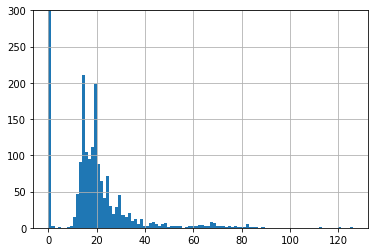

In [90]:
program_start = time.time()
im = imread('../data/easy/cylinder/cylinder_1.jpg')
grayed = convert_to_grayscale(im)
blured = filter_2d(grayed, blur_kernel)
Gx = filter_2d(blured, Kx)
Gy = filter_2d(blured, Ky)

#Compute Gradient Magnitude and Direction:
G_magnitude = np.sqrt(Gx**2+Gy**2)
#G_direction = np.arctan2(Gy, Gx)
edges = G_magnitude > 100
y_coords, x_coords = np.where(edges)
y_coords_flipped = edges.shape[1] - y_coords

accumulator = np.zeros((phi_bins, theta_bins))

for i in range(len(x_coords)):
    #Grab a single point
    x = x_coords[i]
    y = y_coords_flipped[i]

    #Actually do transform!
    curve_rhos = x*np.cos(thetas)+y*np.sin(thetas)

    for j in range(len(thetas)):
        #Make sure that the part of the curve falls within our accumulator
        if np.min(abs(curve_rhos[j]-rhos)) <= 1.0:
            #Find the cell our curve goes through:
            rho_index = argmin(abs(curve_rhos[j]-rhos))
            accumulator[rho_index, j] += 1
max_accum = np.max(accumulator)
edges = accumulator > max_accum*.35
total_edges = sum(edges==1)
program_end = time.time()
total_time = round(program_end-program_start,5)
print(total_edges, total_time, max_accum)

'''
fig1 = figure(0, (12,24))
fig1_1 = fig1.add_subplot(1,2,1)
imshow(edges)
fig1_2 = fig1.add_subplot(1,2,2)
imshow(accumulator)
'''

hist(accumulator.ravel(), 100);
grid(1); ylim(0,300)